# Análise de dados eleitorais: 
### Análise por gênero e faixa etária
Análise de dados eleitorais de 2020 utilizando como principal assunto o gênero e faixa etária dos eleitores.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
file = r'C:\Users\lucas\Documents\analise_dados\perfil_eleitorado_ATUAL.csv'
df = pd.read_csv(file, delimiter=';',
                 error_bad_lines=False, encoding='latin1')

In [3]:
df.shape

(4306904, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306904 entries, 0 to 4306903
Data columns (total 21 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRIA        int64 
 7   DS_MUN_SIT_BIOMETRIA        object
 8   NR_ZONA                     int64 
 9   CD_GENERO                   int64 
 10  DS_GENERO                   object
 11  CD_ESTADO_CIVIL             int64 
 12  DS_ESTADO_CIVIL             object
 13  CD_FAIXA_ETARIA             int64 
 14  DS_FAIXA_ETARIA             object
 15  CD_GRAU_ESCOLARIDADE        int64 
 16  DS_GRAU_ESCOLARIDADE        object
 17  QT_ELEITORES_PERFIL         int64 
 18  QT_ELEITORES_BIOMETRIA      int64 
 19  QT_ELEITORES_DEFICIENCIA    int64 
 20  QT

In [5]:
df.sample(20)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
2261863,11/11/2020,21:20:42,9999,MS,98019,BODOQUENA,-1,#NULO#,15,2,MASCULINO,3,CASADO,7074,70 a 74 anos,1,ANALFABETO,7,6,0,0
4297179,11/11/2020,21:20:42,9999,SP,69795,RIO CLARO,-1,#NULO#,288,0,NÃO INFORMADO,0,NÃO INFORMADO,7074,70 a 74 anos,2,LÊ E ESCREVE,3,0,0,0
2034833,11/11/2020,21:20:42,9999,RJ,58971,SÃO GONÇALO,-1,#NULO#,133,2,MASCULINO,7,SEPARADO JUDICIALMENTE,5559,55 a 59 anos,4,ENSINO FUNDAMENTAL COMPLETO,4,2,0,0
1967617,11/11/2020,21:20:42,9999,MG,48216,MATOZINHOS,-1,#NULO#,174,4,FEMININO,9,DIVORCIADO,7074,70 a 74 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,14,13,0,0
1780635,11/11/2020,21:20:42,9999,MA,9210,SÃO LUÍS,-1,#NULO#,3,4,FEMININO,9,DIVORCIADO,6064,60 a 64 anos,8,SUPERIOR COMPLETO,148,148,0,0
3706225,11/11/2020,21:20:42,9999,SP,64050,ESTRELA D'OESTE,-1,#NULO#,233,4,FEMININO,1,SOLTEIRO,2124,21 a 24 anos,6,ENSINO MÉDIO COMPLETO,79,73,0,0
2585815,11/11/2020,21:20:42,9999,SP,66397,LIMEIRA,-1,#NULO#,66,2,MASCULINO,9,DIVORCIADO,3539,35 a 39 anos,8,SUPERIOR COMPLETO,48,48,0,0
745052,11/11/2020,21:20:42,9999,MT,90077,ALTO GARÇAS,-1,#NULO#,45,2,MASCULINO,1,SOLTEIRO,6569,65 a 69 anos,4,ENSINO FUNDAMENTAL COMPLETO,3,3,0,0
4291265,11/11/2020,21:20:42,9999,RJ,60011,RIO DE JANEIRO,-1,#NULO#,21,2,MASCULINO,5,VIÚVO,7074,70 a 74 anos,2,LÊ E ESCREVE,3,2,0,0
1744645,11/11/2020,21:20:42,9999,PI,12343,CAJAZEIRAS DO PIAUÍ,-1,#NULO#,94,2,MASCULINO,1,SOLTEIRO,7579,75 a 79 anos,1,ANALFABETO,2,2,0,0


In [6]:
df.groupby('CD_GENERO')['DS_GENERO'].max()

CD_GENERO
0    NÃO INFORMADO
2        MASCULINO
4         FEMININO
Name: DS_GENERO, dtype: object

<AxesSubplot:title={'center':'Quantidade de eleitores por faixa etária em Jacareí '}, xlabel='Faixa Etária', ylabel='Quantidade de eleitores'>

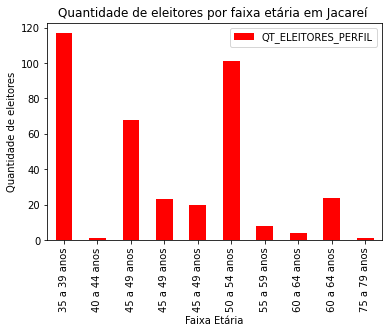

In [9]:
mun = df.query('NM_MUNICIPIO == "JACAREÍ"')
mun.tail(10).plot(kind='bar',
                 x='DS_FAIXA_ETARIA', y='QT_ELEITORES_PERFIL', color='RED', title='Quantidade de eleitores por faixa etária em Jacareí ', 
                  xlabel='Faixa Etária', ylabel='Quantidade de eleitores')